# Precision-recall visualization

In [1]:
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns
import pandas as pd


Note :
* 0 : Non-revelant document
* 1 : Revelant document

In [2]:
document = [
    0, 1, 0, 1,
    1, 0, 0, 1,
    0, 0, 0, 1,
    1, 0, 1, 0
]
total_relevant_doc = document.count(1)


# Calculate Precision@k and Recall@K

In [3]:
prec = []
recall = []


In [4]:
for i in range(len(document)):
    curr_prec = sum(document[:i+1]) / (i+1)
    curr_recall = sum(document[:i+1]) / total_relevant_doc
    prec.append(curr_prec)
    recall.append(curr_recall)


# Obtain Interpolated Precision@Recall Curve

In [5]:
dict_recall = {}
for i in range(len(recall)):
    if f'{recall[i]}' not in dict_recall:
        dict_recall[f'{recall[i]}'] = prec[i]
    elif dict_recall[f'{recall[i]}'] < prec[i]:
        dict_recall[f'{recall[i]}'] = prec[i]
step_recall = [float(i[0]) for i in dict_recall.items()]
step_prec = [i[1] for i in dict_recall.items()]


# Precision@k visualization

In [6]:
prec_df = pd.DataFrame(columns=['K', 'Precision'])
for i in range(len(document)):
    prec_df['K'].loc[i+1] = i+1
    prec_df['Precision'].loc[i+1] = prec[i]


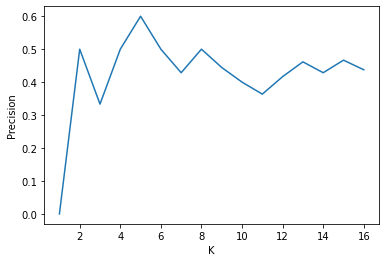

In [7]:
sns.lineplot(x="K", y="Precision", data=prec_df)


# Recall@k visualization

In [8]:
recall_df = pd.DataFrame(columns=['K', 'Recall'])
for i in range(len(document)):
    recall_df['K'].loc[i+1] = i+1
    recall_df['Recall'].loc[i+1] = recall[i]


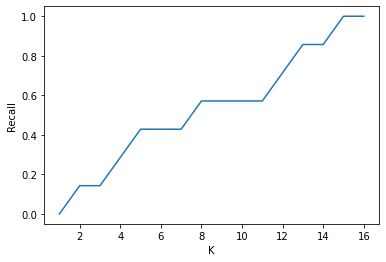

In [9]:
sns.lineplot(x="K", y="Recall", data=recall_df)


# Precision@Recall curve visualization

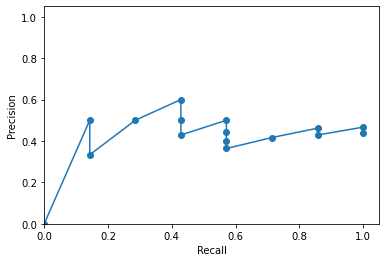

In [10]:
plt.figure()
plt.plot(recall, prec)
plt.scatter(recall, prec)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0, 1.05])
plt.ylim([0, 1.05])
plt.show()


# Interpolated Precision@Recall curve visualization

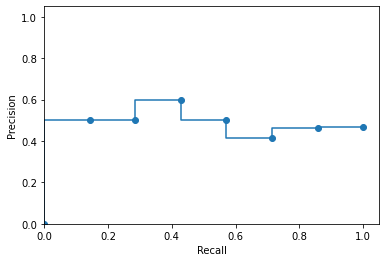

In [11]:
plt.figure()
plt.step(step_recall, step_prec)
plt.scatter(step_recall, step_prec)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0., 1.05])
plt.ylim([0, 1.05])
plt.show()
